## Car Price Prediction

### Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

In [2]:
df = pd.read_csv("data/car data.csv")

In [3]:
df.head(5)

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [4]:
# Checking shape(rows, columns) of data 
df.shape

(301, 9)

In [5]:
# Checking for dtypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Checking for missing or null Values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# Checkign Statistical values 
df.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

### Printing unique values for ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission','Owner'] columns as other remaining columns could contain highly variable values.

In [8]:
for i in df:
    if i in ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission','Owner']:
        print("Unique values for",i, ":" ,df[i].unique(), ",and those are total :", df[i].nunique(), end = "\n\n") 

Unique values for Year : [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007] ,and those are total : 16

Unique values for Fuel_Type : ['Petrol' 'Diesel' 'CNG'] ,and those are total : 3

Unique values for Seller_Type : ['Dealer' 'Individual'] ,and those are total : 2

Unique values for Transmission : ['Manual' 'Automatic'] ,and those are total : 2

Unique values for Owner : [0 1 3] ,and those are total : 3



### Removing "Car_Name" in new dataset as its not required for current scenario as it would not help much in prediction the preuce of car as car has a unique name.

In [9]:
df1 = df.drop('Car_Name', axis=1)

In [10]:
df1.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  
0       Manual      0  
1       Manual      0  
2       Manual      0  
3       Manual      0  
4       Manual      0

## Feature Engineering

###  Creating new column to get new derived column from 'Year' and 'Current_Year' as "No_Of_Year"

In [11]:
df1["Current_Year"] = 2024

In [12]:
df1.head(4)

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   

  Transmission  Owner  Current_Year  
0       Manual      0          2024  
1       Manual      0          2024  
2       Manual      0          2024  
3       Manual      0          2024

In [13]:
# Creating new column named 'No_of_Years' so that we can use this measure for prediction of price in to current year
df1["No_Of_Years"] = df1["Current_Year"] - df1["Year"]

In [14]:
df1.head(4)

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   

  Transmission  Owner  Current_Year  No_Of_Years  
0       Manual      0          2024           10  
1       Manual      0          2024           11  
2       Manual      0          2024            7  
3       Manual      0          2024           13

In [15]:
# Dropping 'Year' and 'Current_Year' as those won't be the measure used for prediction of price
df1.drop(columns=(['Year', 'Current_Year']), axis = 1, inplace = True)

## Converting Nominal/Categorical Data to Numerical datatype

In [16]:
# get_dummies helps to convert categorical into numerical data type just like onehot encoding. 
df1=pd.get_dummies(df1, drop_first=True) 
# Here "drop_first=True" means that we drop first column of that column which gets converted to numerical one 

In [17]:
df1.head()

Selling_Price  Present_Price  Kms_Driven  Owner  No_Of_Years  \
0           3.35           5.59       27000      0           10   
1           4.75           9.54       43000      0           11   
2           7.25           9.85        6900      0            7   
3           2.85           4.15        5200      0           13   
4           4.60           6.87       42450      0           10   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0             False              True                   False   
1              True             False                   False   
2             False              True                   False   
3             False              True                   False   
4              True             False                   False   

   Transmission_Manual  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True

In [18]:
# Correlation between numerical columns
df1.corr()

Selling_Price  Present_Price  Kms_Driven     Owner  \
Selling_Price                1.000000       0.878983    0.029187 -0.088344   
Present_Price                0.878983       1.000000    0.203647  0.008057   
Kms_Driven                   0.029187       0.203647    1.000000  0.089216   
Owner                       -0.088344       0.008057    0.089216  1.000000   
No_Of_Years                 -0.236141       0.047584    0.524342  0.182104   
Fuel_Type_Diesel             0.552339       0.473306    0.172515 -0.053469   
Fuel_Type_Petrol            -0.540571      -0.465244   -0.172874  0.055687   
Seller_Type_Individual      -0.550724      -0.512030   -0.101419  0.124269   
Transmission_Manual         -0.367128      -0.348715   -0.162510 -0.050316   

                        No_Of_Years  Fuel_Type_Diesel  Fuel_Type_Petrol  \
Selling_Price             -0.236141          0.552339         -0.540571   
Present_Price              0.047584          0.473306         -0.465244   
Kms_Driven                 0.524342          0.172515         -0.172874   
Owner                      0.182104         -0.053469          0.055687   
No_Of_Years                1.000000         -0.064315          0.059959   
Fuel_Type_Diesel          -0.064315          1.000000         -0.979648   
Fuel_Type_Petrol           0.059959         -0.979648          1.000000   
Seller_Type_Individual     0.039896         -0.350467          0.358321   
Transmission_Manual       -0.000394         -0.098643          0.091013   

                        Seller_Type_Individual  Transmission_Manual  
Selling_Price                        -0.550724            -0.367128  
Present_Price                        -0.512030            -0.348715  
Kms_Driven                           -0.101419            -0.162510  
Owner                                 0.124269            -0.050316  
No_Of_Years                           0.039896            -0.000394  
Fuel_Type_Diesel                     -0.350467            -0.098643  
Fuel_Type_Petrol                      0.358321             0.091013  
Seller_Type_Individual                1.000000             0.063240  
Transmission_Manual                   0.063240             1.000000

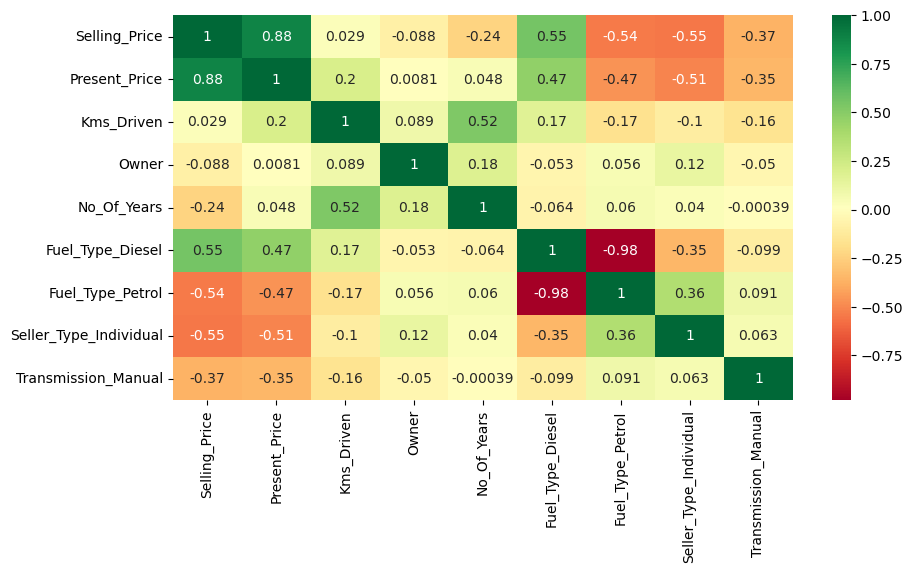

In [19]:
#Plotting Heatmap to check the correlation between each columns
corrmap = df1.corr()
top_corr_features = corrmap.index 
plt.figure(figsize=(10,5))
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")


## Training the model

### Splitting data into train_test_split

In [20]:
# Independent variables
X = df1.drop("Selling_Price", axis = 1)

# Dependent variables
y = df1['Selling_Price']

In [21]:
X.head()

Present_Price  Kms_Driven  Owner  No_Of_Years  Fuel_Type_Diesel  \
0           5.59       27000      0           10             False   
1           9.54       43000      0           11              True   
2           9.85        6900      0            7             False   
3           4.15        5200      0           13             False   
4           6.87       42450      0           10              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True

In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [24]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=10)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 8), (61, 8), (240,), (61,))

## Training the model Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predicting values 
y_preds = model.predict(X_test)

In [30]:
# printing out top 10 predicted values
y_preds[:10]

array([ 7.78311122,  0.80492133,  1.88830514,  2.05092328,  5.25115027,
        6.80264993, 19.67617202, -3.31906928,  1.01503656,  4.40955539])

## Evaluating the model

In [32]:
# Importing metrics for linear regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"The Mean Absolute Error (MAE): {mean_absolute_error(y_test,y_preds)}")
print(f"The Mean Squared Error (MAE): {mean_squared_error(y_test,y_preds)}")
print(f"The R2 Score: {r2_score(y_test,y_preds)}")


The Mean Absolute Error (MAE): 1.2944987410104365
The Mean Squared Error (MAE): 5.075348220392687
The R2 Score: 0.8436773164235072


## Predicting Price of Car using this Model

In [40]:
# Giving a test data of a 1st car in the above dataset.
Test = [[5.59,27000, 0, 10, 0, 1, 0,1]]
# Present_Price, Kms_Driven, Owner, No_of_Years, Fuel_Type_Diesel, Fuel_Type_Petrol, Seller_Type_Individual, Transmission_Manual
prediction = model.predict(Test)


print(f"The actual cost of car is {df1.Selling_Price [0]}, and predicted value of the same is {prediction[0]:.2f} using Linear Regression")


The actual cost of car is 3.35, and predicted value of the same is 3.93 using Linear Regression


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
